# Bone ROC new Train (predict data)

## Import data

In [37]:
import numpy as np
from sklearn.preprocessing import label_binarize

pdata = np.load('predict_results_no_y_1/y_predict.npy')
print(pdata[:20])

odata = np.genfromtxt('data/bone_marrow_gene_pairs_200.txt', delimiter = '\t', dtype=None)
original = []
for i in range(len(odata)):
    original.append(odata[i][2])
realO = []
for i in range(len(original)):
    if int(original[i]) > 0:
        realO.append(1)
    else:
        realO.append(0)
realO = np.array(realO)[np.newaxis]
print(realO.T.shape)
n_classes = realO.T.shape[1]
print(n_classes)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  import sys


(80253, 1)
1


## ROC curve and AUC

In [38]:
from sklearn import metrics

fpr = []
tpr = []
roc_auc = []
for i in range(n_classes):
    ftemp, ttemp, _ = metrics.roc_curve(realO.T[:,i], pdata[:,i])
    fpr.append(ftemp)
    tpr.append(ttemp)
    roc_auc.append(metrics.auc(fpr[i], tpr[i]))

roc_auc

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## Plot ROC curve

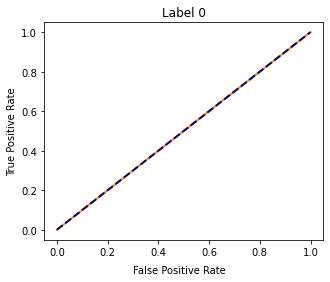

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True)
fig.set_figwidth(5)
lw = 2
ax1.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
ax1.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

# ax2.plot(
#     fpr[1],
#     tpr[1],
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc[1],
# )
# ax2.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

# ax3.plot(
#     fpr[2],
#     tpr[2],
#     color="darkorange",
#     lw=lw,
#     label="ROC curve (area = %0.2f)" % roc_auc[2],
# )
# ax3.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

ax1.set_title('Label 0')
# ax2.set_title('Label 1')
# ax3.set_title('Label 2')

ax1.set(ylabel='True Positive Rate')
fig.text(0.5, 0.01, 'False Positive Rate', ha='center')
plt.show()